# Homework 7: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [5]:
library("tidyverse")
library("dplyr")

setwd("/Users/jermondrake/Desktop/DataSciencePsychNeuro/Homeworks/lexDat")

LexicalData <- read_csv("LexicalData_withIncorrect.csv")

Items <- read_csv("Items.csv")

Lexx <- rename(LexicalData, Word = D_Word)
JAD <- left_join(x=Lexx, y=Items, by = "Word")
JADD <- drop_na(JAD)
head(JADD)

New names:
* `` -> ...1

Rows: 74869 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): D_Word
dbl (6): ...1, Sub_ID, Trial, Type, D_Zscore, Correct
lgl (1): Outlier

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 30959 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Word
dbl (3): Occurrences, Length, Log_Freq_HAL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Sub_ID,Trial,Type,D_RT,Word,Outlier,D_Zscore,Correct,Occurrences,Length,Freq_HAL,Log_Freq_HAL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,157,1,1,710,browse,FALSE,-0.437,1,2,6,7016,8.856
2,67,1,1,1094,refrigerant,FALSE,0.825,1,3,11,104,4.644
3,120,1,1,587,gaining,FALSE,-0.645,1,4,7,4039,8.304
4,21,1,1,984,cheerless,FALSE,0.025,1,4,9,14,2.639
5,236,1,1,577,pattered,FALSE,-0.763,1,4,8,4,1.386
6,236,2,1,715,conjures,FALSE,-0.364,1,4,8,194,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

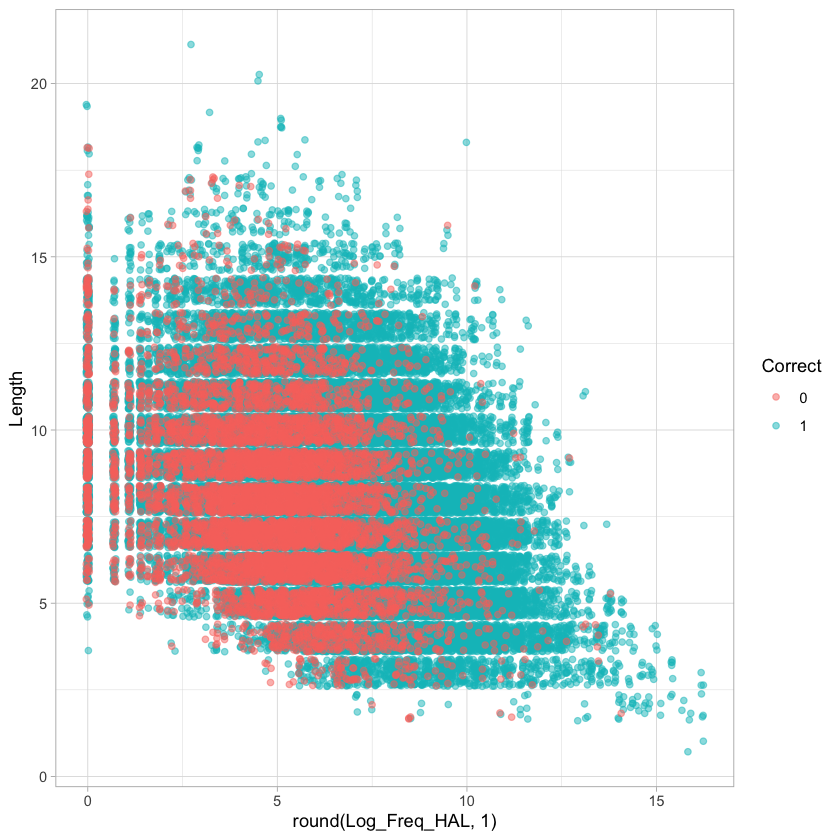

In [6]:
JADD$Correct <- as.factor(JADD$Correct)
ggplot(JADD,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light() 


What do you observe about the "Correct" and "Incorrect" clusters? 

The incorrect cluster (0s/red dots) tends to primarily occur when the word is less common, and the word is longer. 
The correct cluster (1s/ blue dots) tends to primarily occur when word is more common, and the length is shorter. Additionally, overall, there appears to be greater variability in the incorrect cluster.

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [10]:
glm.fit=glm(Correct~Length * Log_Freq_HAL, data =JADD, family=binomial) 
summary(glm.fit)


Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = JADD)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)


> Word length, namely frequency, and the interaction between the word length and namely frequency, appear to signficantly associate with the likelihood/probability of indicating whether the letter string is a word or not. 

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [17]:
library(stats)
glm_prob_df = data.frame(predict(glm.fit, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')

num_observations = nrow(glm_prob_df)
glm_prob_df$index = seq(1, num_observations) #get the observation number for plotting; ggplot does 

threshold = 0.50 #binarizing threshold 

glm_prob_df$predicted_binary=rep("0",num_observations)

glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="1" #find the rows that have prob > threshold and cast as 'up'

# Now let's look at the prediction accuracy
confusion_df = data.frame(glm_prob_df$predicted_binary, JADD$Correct)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

# We can calculate the prediction accuracy by counting the number of times our
# prediction vector matched the real data and taking the average
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


Did the model do well at predicting lexical decision correctness? Why or why not? 

 > Overall the model appears to have done pretty well. It is correct approxiametly 88% of the time in estimating whether the letter string is a word or not.

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [18]:
library("MASS")

qda.fit <- qda(Correct ~ Log_Freq_HAL*Length, data =JADD)
qda.fit



Call:
qda(Correct ~ Log_Freq_HAL * Length, data = JADD)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
  Log_Freq_HAL   Length Log_Freq_HAL:Length
0     4.932123 8.047124            37.95260
1     6.444849 7.979971            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [20]:
# WRITE YOUR CODE HERE

#QDA 
qda.pred=predict(qda.fit, JADD)

# Extracting  output of the prediction 
qda.class = qda.pred$class
table(qda.class, JADD$Correct)
print(paste("Accuracy:",mean(qda.class==JADD$Correct)))

         
qda.class     0     1
        0   455  1647
        1  7524 60963

[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

The QDA prediction performance is similar to the logistic regression, but the QDA performed slighly worse.. .870 for the QDA vs .886 for the logistic regression.

**DUE:** 5pm EST, March 25, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*